## Simulating an Infection

In [208]:
function countsnew(data)
    d = Dict{Int, Int}()
    for element in data
        if haskey(d, element)
            d[element]+=1
        else 
            d[element]=1
        end 
    end
    ks=collect(keys(d))
    vs=collect(values(d))
    p=sortperm(ks)
    
    return ks[p], vs[p]
    
            
end

countsnew (generic function with 1 method)

In [209]:
vv = [1, 0, 1, 0, 1000, 1, 1, 1000]
countsnew(vv)

([0, 1, 1000], [2, 4, 2])

In [210]:
function probability_distribution(results)
    keys=results[1]
    values=results[2]
    valuessum=sum(values)
    valuesnew=results[2]./valuessum
    return keys, valuesnew
end

probability_distribution (generic function with 1 method)

In [211]:
@enum InfectionStatus S I R

In [212]:
x=S

S::InfectionStatus = 0

In [213]:
Int(x)

0

In [214]:
x=I

I::InfectionStatus = 1

In [215]:
Int(I)

1

In [216]:
x=R

R::InfectionStatus = 2

In [217]:
Int(x)

2

In [218]:
N=100

100

In [219]:
agents=[i=S for i in 1:N]

100-element Array{InfectionStatus,1}:
 S::InfectionStatus = 0
 S::InfectionStatus = 0
 S::InfectionStatus = 0
 S::InfectionStatus = 0
 S::InfectionStatus = 0
 S::InfectionStatus = 0
 S::InfectionStatus = 0
 S::InfectionStatus = 0
 S::InfectionStatus = 0
 S::InfectionStatus = 0
 S::InfectionStatus = 0
 S::InfectionStatus = 0
 S::InfectionStatus = 0
 ⋮
 S::InfectionStatus = 0
 S::InfectionStatus = 0
 S::InfectionStatus = 0
 S::InfectionStatus = 0
 S::InfectionStatus = 0
 S::InfectionStatus = 0
 S::InfectionStatus = 0
 S::InfectionStatus = 0
 S::InfectionStatus = 0
 S::InfectionStatus = 0
 S::InfectionStatus = 0
 S::InfectionStatus = 0

In [220]:
r=rand(1:100)

63

In [221]:
agents[r]=I


I::InfectionStatus = 1

In [222]:
agents[r]

I::InfectionStatus = 1

In [223]:
function step!(Vector_Agents, p_I)
    
    i=rand(1:length(Vector_Agents))
    a=Vector_Agents[i]
    
    if(a==I)
        
        i_2=i
        
        while (i_2 == i)
        i_2=rand(1:length(Vector_Agents))
        end
        
        r=rand()
        if ((r<p_I) && (Vector_Agents[i_2]==S))
            Vector_Agents[i_2]=I
        end
        
    end
        
            
end

step! (generic function with 1 method)

In [224]:
function sweep!(Vector_Agents, p_I, N)
   

    for time in 1:N
       
        step!(Vector_Agents, p_I)
        
    end
        
end

sweep! (generic function with 1 method)

In [225]:
function infection_simulation(N, p_I, T)
    
   agents=[i=S for i in 1:N]
   ri=rand(1:100) 
   agents[ri]=I
    
   Is=Int64[]
    
   for time in 1:T 
        
       sweep!(agents, p_I, N)
       push!(Is, count(agents.==I)) 
    
    end
    
    return Is
    
    
end

infection_simulation (generic function with 1 method)

In [226]:
results=Array[]

Array[]

In [227]:
for time in 1:50
   
    Is=infection_simulation(100, 0.02, 1000)
    push!(results, Is )
end

In [228]:
results

50-element Array{Array,1}:
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [1, 1, 1, 1, 2, 2, 2, 2, 2, 2  …  100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [1, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [1, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [1, 1, 1, 1, 1, 1, 2, 2, 2, 2  …  100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [1, 1, 1, 1, 1, 1, 2, 3, 3, 3  …  100

In [229]:
using Plots

In [230]:
s=plot();
xlabel!("sweep");
ylabel!("Number of Is");

In [231]:
for vector in results
    
 plot!(vector, alpha=0.5, leg=false)
    
end

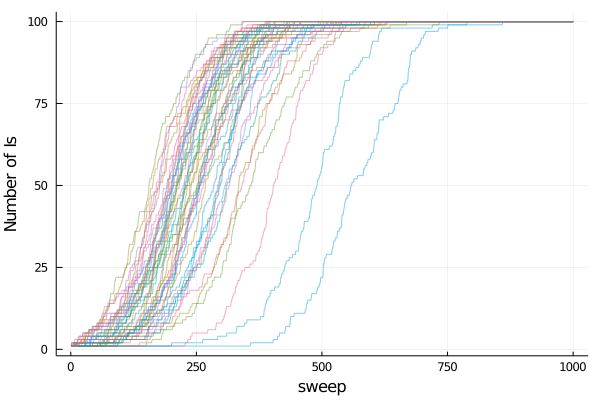

In [232]:
s

In [233]:
using StatsBase

In [234]:
mt=mean(results)

1000-element Array{Float64,1}:
   1.0
   1.04
   1.04
   1.04
   1.08
   1.08
   1.18
   1.2
   1.22
   1.24
   1.26
   1.32
   1.34
   ⋮
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0

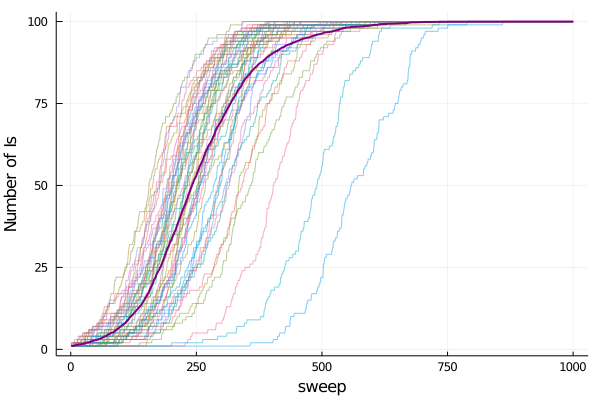

In [235]:
plot!(mt, linewidth = 2, color="purple")

In [236]:
d=Array[]

Array[]

In [237]:
c=1

for experiment in results
   
    exp=Float64[]
    for element in experiment
        mn=mt[c] 
        distance= (mn-element)^2
        push!(exp, distance)
        c+=1
    end
    
    push!(d, exp)
    c=1
        
end

d

50-element Array{Array,1}:
 [0.0, 0.001600000000000003, 0.001600000000000003, 0.001600000000000003, 0.006400000000000012, 0.006400000000000012, 0.03239999999999998, 0.03999999999999998, 0.04839999999999999, 0.0576  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.001600000000000003, 0.001600000000000003, 0.001600000000000003, 0.8463999999999998, 0.8463999999999998, 0.6724000000000001, 0.6400000000000001, 0.6084, 0.5776  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.001600000000000003, 0.001600000000000003, 0.001600000000000003, 0.006400000000000012, 0.006400000000000012, 0.03239999999999998, 0.03999999999999998, 0.04839999999999999, 0.0576  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.001600000000000003, 0.001600000000000003, 0.001600000000000003, 0.006400000000000012, 0.006400000000000012, 0.03239999999999998, 0.03999999999999998, 0.04839999999999999, 0.0576  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.001600000000000003,

In [238]:
σs=mean(d)

1000-element Array{Float64,1}:
 0.0
 0.03840000000000004
 0.03840000000000004
 0.03840000000000004
 0.07360000000000014
 0.07360000000000014
 0.1476
 0.19999999999999984
 0.2115999999999998
 0.22240000000000013
 0.23239999999999994
 0.25759999999999983
 0.30440000000000017
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [239]:
σ=σs.^(1/2)

1000-element Array{Float64,1}:
 0.0
 0.19595917942265434
 0.19595917942265434
 0.19595917942265434
 0.271293199325011
 0.271293199325011
 0.38418745424597095
 0.44721359549995776
 0.45999999999999974
 0.471593044902064
 0.48207883172775795
 0.5075431016179807
 0.551724568965349
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

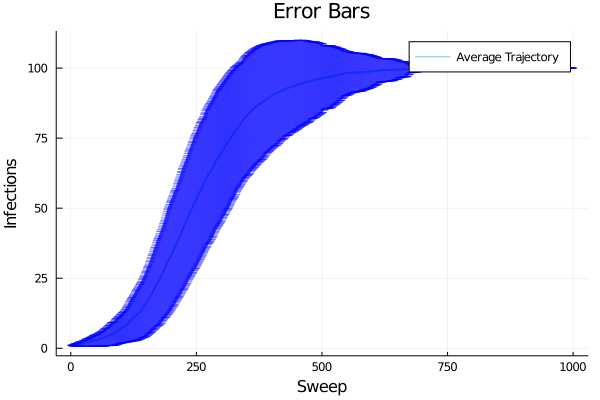

In [240]:
plot(mt, linewidth = 2, yerr=σ, alpha=0.6, labels="Average Trajectory", markerstrokecolor="blue")
xlabel!("Sweep")
ylabel!("Infections")
title!("Error Bars")

## Agent Type

In [241]:
mutable struct Agent
    status::InfectionStatus 
    num_infected::Int64
    Agent()=new(S, 0)
end

In [242]:
a=Agent()

Agent(S, 0)

In [243]:
a.status

S::InfectionStatus = 0

In [244]:
a.num_infected

0

In [245]:
function step2!(Vector_Agents::Vector{Agent}, p_I)
    
    i=rand(1:length(Vector_Agents))
    a=Vector_Agents[i].status
    
    if(a==I)
        
        i_2=i
        
        while (i_2 == i)
        i_2=rand(1:length(Vector_Agents))
        end
        
        r=rand()
        if ((r<p_I) && (Vector_Agents[i_2].status==S))
            Vector_Agents[i_2].status=I
            Vector_Agents[i].num_infected+=1
        end
        
    end
        
            
end

step2! (generic function with 1 method)

In [246]:
function sweep2!(Vector_Agents::Vector{Agent}, p_I, N)
   

    for time in 1:N
       
        step2!(Vector_Agents, p_I)
        
    end
        
end

sweep2! (generic function with 1 method)

In [247]:
function num_infected_dist_simulation(N, p_I, T)
    
   agents=[Agent() for i in 1:N]
   ri=rand(1:N) 
   agents[ri].status=I
    
   n_iv=Int64[]
    
   for time in 1:T 
        
       sweep2!(agents, p_I, N)
    
    end
    
    for agent in agents
        
        
        n_i=agent.num_infected
        push!(n_iv, n_i)
        
    end
    
    counting=countsnew(n_iv)
    pd=probability_distribution(counting)
    
    return pd

end

num_infected_dist_simulation (generic function with 1 method)

In [248]:
pd= num_infected_dist_simulation(100, 0.02, 1000)

([0, 1, 2, 3, 4, 6], [0.47, 0.26, 0.16, 0.07, 0.02, 0.02])

In [249]:

k=Array[]
v=Array[]

for N in 1:50
    pd=num_infected_dist_simulation(100, 0.02, 1000)
    push!(k, pd[1])
    push!(v, pd[2])
end



In [250]:
k

50-element Array{Array,1}:
 [0, 1, 2, 3, 4, 5, 7]
 [0, 1, 2, 3, 4, 6, 7]
 [0, 1, 2, 3, 4, 6]
 [0, 1, 2, 3, 4, 5]
 [0, 1, 2, 3, 4, 5]
 [0, 1, 2, 3, 4, 6]
 [0, 1, 2, 3, 4, 5, 6]
 [0, 1, 2, 3, 4, 5, 6]
 [0, 1, 2, 3, 4, 5, 6]
 [0, 1, 2, 3, 4, 6, 7, 8]
 [0, 1, 2, 3, 4, 5]
 [0, 1, 2, 3, 4, 5, 6, 7]
 [0, 1, 2, 3, 4, 6, 7, 8]
 ⋮
 [0, 1, 2, 3, 4, 6]
 [0, 1, 2, 3, 4, 5]
 [0, 1, 2, 3, 4, 5, 6]
 [0, 1, 2, 3, 4, 7]
 [0, 1, 2, 3, 4, 5, 6]
 [0, 1, 2, 3, 4, 6]
 [0, 1, 2, 3, 5, 6, 7]
 [0, 1, 2, 3, 4, 5, 6]
 [0, 1, 2, 3, 4, 5]
 [0, 1, 2, 3, 4, 6]
 [0, 1, 2, 3, 4, 5, 6]
 [0, 1, 2, 3, 4, 5, 6, 8]

In [251]:
v

50-element Array{Array,1}:
 [0.54, 0.17, 0.16, 0.06, 0.05, 0.01, 0.01]
 [0.55, 0.22, 0.07, 0.09, 0.04, 0.01, 0.02]
 [0.47, 0.29, 0.1, 0.08, 0.05, 0.01]
 [0.49, 0.27, 0.09, 0.07, 0.07, 0.01]
 [0.51, 0.19, 0.18, 0.07, 0.02, 0.03]
 [0.5, 0.28, 0.09, 0.05, 0.05, 0.03]
 [0.44, 0.31, 0.15, 0.05, 0.03, 0.01, 0.01]
 [0.51, 0.21, 0.15, 0.07, 0.04, 0.01, 0.01]
 [0.53, 0.22, 0.09, 0.09, 0.04, 0.02, 0.01]
 [0.5, 0.33, 0.05, 0.04, 0.04, 0.01, 0.02, 0.01]
 [0.47, 0.27, 0.14, 0.05, 0.06, 0.01]
 [0.54, 0.21, 0.1, 0.08, 0.04, 0.01, 0.01, 0.01]
 [0.49, 0.29, 0.12, 0.05, 0.01, 0.02, 0.01, 0.01]
 ⋮
 [0.51, 0.22, 0.16, 0.03, 0.06, 0.02]
 [0.51, 0.24, 0.09, 0.08, 0.07, 0.01]
 [0.53, 0.21, 0.12, 0.08, 0.01, 0.04, 0.01]
 [0.44, 0.29, 0.18, 0.05, 0.03, 0.01]
 [0.48, 0.28, 0.11, 0.08, 0.02, 0.01, 0.02]
 [0.5, 0.23, 0.14, 0.06, 0.06, 0.01]
 [0.48, 0.27, 0.15, 0.06, 0.01, 0.02, 0.01]
 [0.49, 0.23, 0.17, 0.06, 0.02, 0.02, 0.01]
 [0.53, 0.23, 0.08, 0.07, 0.06, 0.03]
 [0.51, 0.19, 0.15, 0.12, 0.02, 0.01]
 [0.49, 0.2

In [252]:
mxl=Int64[]
for vector in k
    
    for element in vector
        push!(mxl, element)
    end
    
end

maxlv=maximum(mxl)

11

In [253]:
newv=zeros(50, maxlv+1)

50×12 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮                        ⋮    
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [254]:
counter=1
counterf=1

for vector in k
    
    for element in vector
        
        
        newv[counter, element+1]=v[counter][counterf]
        
        counterf+=1   
    end
    
    counterf=1
    counter+=1
    
end
        

In [255]:
newv

50×12 Array{Float64,2}:
 0.54  0.17  0.16  0.06  0.05  0.01  0.0   0.01  0.0   0.0  0.0  0.0
 0.55  0.22  0.07  0.09  0.04  0.0   0.01  0.02  0.0   0.0  0.0  0.0
 0.47  0.29  0.1   0.08  0.05  0.0   0.01  0.0   0.0   0.0  0.0  0.0
 0.49  0.27  0.09  0.07  0.07  0.01  0.0   0.0   0.0   0.0  0.0  0.0
 0.51  0.19  0.18  0.07  0.02  0.03  0.0   0.0   0.0   0.0  0.0  0.0
 0.5   0.28  0.09  0.05  0.05  0.0   0.03  0.0   0.0   0.0  0.0  0.0
 0.44  0.31  0.15  0.05  0.03  0.01  0.01  0.0   0.0   0.0  0.0  0.0
 0.51  0.21  0.15  0.07  0.04  0.01  0.01  0.0   0.0   0.0  0.0  0.0
 0.53  0.22  0.09  0.09  0.04  0.02  0.01  0.0   0.0   0.0  0.0  0.0
 0.5   0.33  0.05  0.04  0.04  0.0   0.01  0.02  0.01  0.0  0.0  0.0
 0.47  0.27  0.14  0.05  0.06  0.01  0.0   0.0   0.0   0.0  0.0  0.0
 0.54  0.21  0.1   0.08  0.04  0.01  0.01  0.01  0.0   0.0  0.0  0.0
 0.49  0.29  0.12  0.05  0.01  0.0   0.02  0.01  0.01  0.0  0.0  0.0
 ⋮                             ⋮                            ⋮    
 0.51  0.22  

In [256]:
mv=Float64[]

for counter in 1:maxlv+1
    
    m2=mean(newv[:, counter])
    push!(mv, m2)
    
end

In [257]:
mk=[n for n in 0:maxlv]

12-element Array{Int64,1}:
  0
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11

In [258]:
mv

12-element Array{Float64,1}:
 0.5002
 0.2456
 0.12719999999999998
 0.06559999999999999
 0.035
 0.0126
 0.0092
 0.003
 0.001
 0.0002
 0.0002
 0.0002

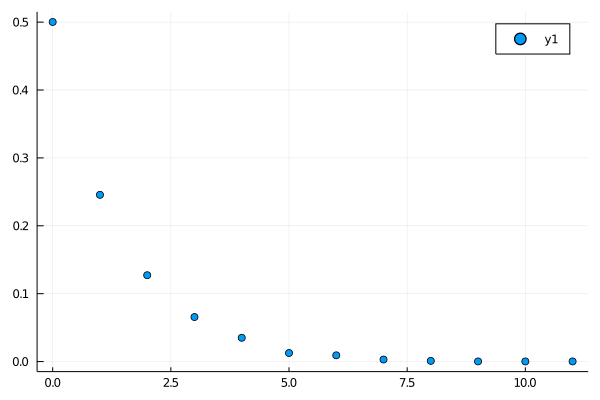

In [259]:
scatter(mk, mv)

## Epidemic Model

In [260]:
function step3!(Vector_Agents::Vector{Agent}, p_I, P_R)
    
    i=rand(1:length(Vector_Agents))
    a=Vector_Agents[i].status
    
    if(a==I)
        
        i_2=i
        
        while (i_2 == i)
        i_2=rand(1:length(Vector_Agents))
        end
        
        r=rand()
        if ((r<p_I) && (Vector_Agents[i_2].status==S))
            Vector_Agents[i_2].status=I
            Vector_Agents[i].num_infected+=1
        end
        
        
    end
    
    
    i2=rand(1:length(Vector_Agents))
    a2=Vector_Agents[i2].status
    r2=rand()
    
    if ((r2<P_R) && (a2==I) )
            
            Vector_Agents[i2].status=R
        
    end
end

step3! (generic function with 1 method)

In [261]:
function sweep3!(Vector_Agents::Vector{Agent}, p_I, P_R, N)
   

    for time in 1:N
       
        step3!(Vector_Agents, p_I, P_R)
        
    end
        
end

sweep3! (generic function with 1 method)

In [262]:
function simulation_with_recovery(N, p_I, P_R, T)
    
   agents=[Agent() for i in 1:N]
   ri=rand(1:N) 
   agents[ri].status=I
    
   n_iv=Int64[]
    
    
   Ss=Int64[]
   Is=Int64[]
   Rs=Int64[]
    
   for time in 1:T 
        
       sweep3!(agents, p_I, P_R, N)
        
       
        AS=0
        AI=0
        AR=0
        
       for agent in agents
            
            status=agent.status
            
            if status==S
                AS+=1
            end
            
            if status==I
                AI+=1
            end
            
            if status==R
                AR+=1
            end
       end
        
        push!(Ss, AS)
        push!(Is, AI)
        push!(Rs, AR)
    end
    
    
    
    for agent in agents
        
        
        n_i=agent.num_infected
        push!(n_iv, n_i)
        
    end
    
    counting=countsnew(n_iv)
    pd=probability_distribution(counting)
    
    return pd, Ss, Is, Rs

end

simulation_with_recovery (generic function with 1 method)

In [263]:
simwr=simulation_with_recovery(100, 0.1, 0.01, 1000)

(([0, 1, 2, 3, 4, 5, 6, 7, 9], [0.55, 0.21, 0.1, 0.09, 0.01, 0.01, 0.01, 0.01, 0.01]), [99, 99, 98, 98, 98, 97, 97, 96, 94, 93  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 2, 2, 2, 3, 3, 4, 6, 7  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  100, 100, 100, 100, 100, 100, 100, 100, 100, 100])

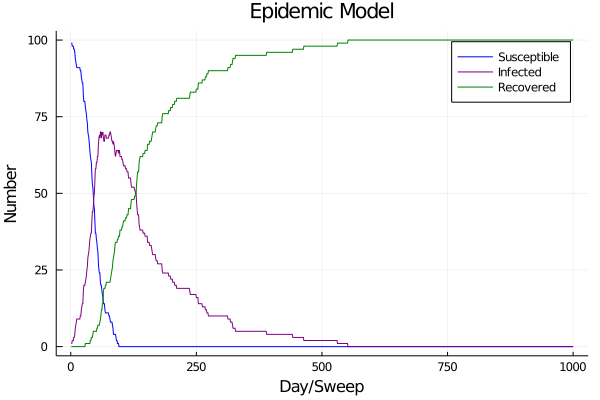

In [264]:
p=plot()
plot!(simwr[2], label="Susceptible", color="blue")
plot!(simwr[3], label="Infected", color="purple")
plot!(simwr[4], label="Recovered", color="green")
title!("Epidemic Model")
ylabel!("Number")
xlabel!("Day/Sweep")

In [265]:
pd=simwr[1]

([0, 1, 2, 3, 4, 5, 6, 7, 9], [0.55, 0.21, 0.1, 0.09, 0.01, 0.01, 0.01, 0.01, 0.01])

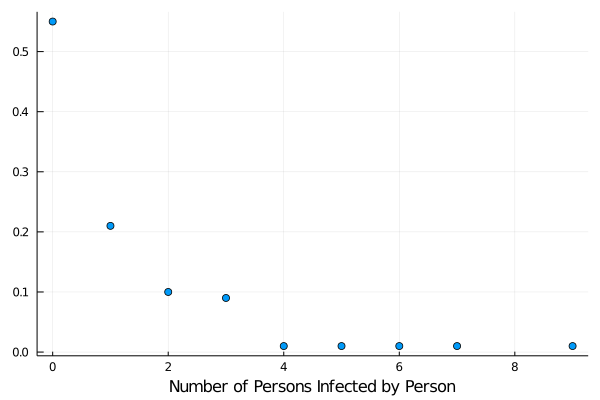

In [266]:
scatter(pd[1], pd[2], leg=false)
xlabel!("Number of Persons Infected by Person")

In [267]:
k=Array[]
v=Array[]

for N in 1:50
    pd=simulation_with_recovery(100, 0.1, 0.01, 1000)[1]
    push!(k, pd[1])
    push!(v, pd[2])
end


In [268]:
k

50-element Array{Array,1}:
 [0, 1, 2, 3, 4, 5, 6]
 [0]
 [0, 1, 2, 3, 4, 5, 6, 8]
 [0, 1, 2, 3, 4, 5, 6]
 [0, 1, 2, 3, 4, 5, 7]
 [0, 1, 2, 3, 4, 6, 8]
 [0, 1, 2, 3, 4, 5]
 [0, 1, 2, 3, 5, 6, 7]
 [0, 1, 2, 3, 4, 5, 8]
 [0]
 [0, 1, 2, 3, 4, 5, 6]
 [0, 1, 2, 3, 4, 5]
 [0, 1, 2, 3, 4, 5, 6, 7]
 ⋮
 [0, 1, 2, 3, 4, 5, 6]
 [0, 1, 2, 3, 4, 6, 10]
 [0, 1, 2, 3, 4, 5]
 [0, 1, 2, 3, 4, 5]
 [0, 1, 2, 3, 4, 5, 6]
 [0, 1, 2, 3, 4, 5, 6, 9]
 [0, 1, 2, 3, 4, 5, 8]
 [0]
 [0, 1, 2, 3, 4, 6, 7]
 [0, 1, 2, 3, 4, 5, 6, 8]
 [0, 1, 2, 3, 4, 8, 9]
 [0, 1, 2, 3, 4, 6, 7]

In [269]:
v

50-element Array{Array,1}:
 [0.51, 0.21, 0.16, 0.05, 0.05, 0.01, 0.01]
 [1.0]
 [0.47, 0.31, 0.09, 0.09, 0.01, 0.01, 0.01, 0.01]
 [0.49, 0.23, 0.15, 0.09, 0.02, 0.01, 0.01]
 [0.5, 0.27, 0.13, 0.02, 0.04, 0.02, 0.02]
 [0.5, 0.25, 0.12, 0.08, 0.03, 0.01, 0.01]
 [0.47, 0.27, 0.14, 0.06, 0.04, 0.02]
 [0.47, 0.28, 0.15, 0.06, 0.02, 0.01, 0.01]
 [0.52, 0.21, 0.15, 0.06, 0.03, 0.02, 0.01]
 [1.0]
 [0.51, 0.22, 0.13, 0.09, 0.02, 0.02, 0.01]
 [0.54, 0.15, 0.17, 0.08, 0.04, 0.02]
 [0.48, 0.29, 0.13, 0.05, 0.01, 0.01, 0.01, 0.02]
 ⋮
 [0.52, 0.24, 0.12, 0.05, 0.02, 0.02, 0.03]
 [0.59, 0.11, 0.15, 0.1, 0.03, 0.01, 0.01]
 [0.54, 0.17, 0.14, 0.08, 0.05, 0.02]
 [0.5, 0.26, 0.11, 0.04, 0.06, 0.03]
 [0.5, 0.24, 0.14, 0.06, 0.03, 0.01, 0.02]
 [0.5, 0.27, 0.14, 0.02, 0.02, 0.03, 0.01, 0.01]
 [0.51, 0.27, 0.07, 0.08, 0.04, 0.02, 0.01]
 [1.0]
 [0.47, 0.22, 0.24, 0.04, 0.01, 0.01, 0.01]
 [0.55, 0.21, 0.11, 0.05, 0.04, 0.01, 0.02, 0.01]
 [0.46, 0.34, 0.09, 0.06, 0.03, 0.01, 0.01]
 [0.48, 0.28, 0.15, 0.02, 0.04,

In [270]:
mxl=Int64[]
for vector in k
    
    for element in vector
        push!(mxl, element)
    end
    
end

maxlv=maximum(mxl)

10

In [271]:
newv=zeros(50, maxlv+1)

50×11 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮                        ⋮
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

In [272]:
counter=1
counterf=1

for vector in k
    
    for element in vector
        
        
        newv[counter, element+1]=v[counter][counterf]
        
        counterf+=1   
    end
    
    counterf=1
    counter+=1
    
end

In [273]:
mv=Float64[]

for counter in 1:maxlv+1
    
    m2=mean(newv[:, counter])
    push!(mv, m2)
    
end

In [274]:
mk=[n for n in 0:maxlv]

11-element Array{Int64,1}:
  0
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

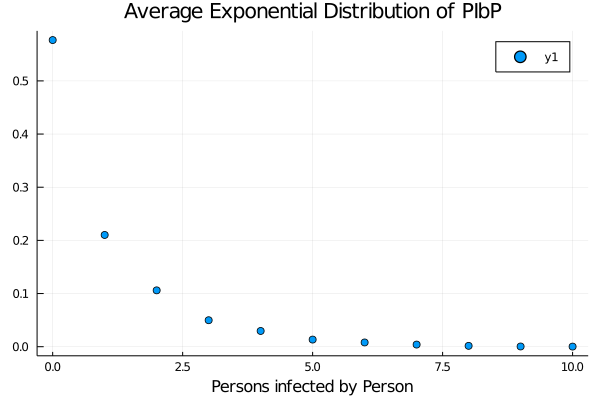

In [275]:
scatter(mk, mv)
title!("Average Exponential Distribution of PIbP")
xlabel!("Persons infected by Person")

## Questions

1) How long did everyone take to recover?

2) Which was the average rate of infection during the first 100 days?

3) On average which was the number of persons infected by one agent?

1)

In [276]:
recovered=simwr[4]

1000-element Array{Int64,1}:
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   ⋮
 100
 100
 100
 100
 100
 100
 100
 100
 100
 100
 100
 100

In [278]:
counter=0
for number_r in recovered
    
    counter+=1
    
    if number_r == 100
        
        break
        
    end
    
end

In [279]:
R_d=counter

552

Everyone was recover after 552 days

2)

In [281]:
Infected=simwr[3]

1000-element Array{Int64,1}:
 1
 1
 2
 2
 2
 3
 3
 4
 6
 7
 8
 9
 9
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [282]:
firstday=Infected[1]

1

In [283]:
hday=Infected[100]

62

In [285]:
slope=(62-1)/(100-1)

0.6161616161616161

On Average during the first 100 days 1-(0.6) person was infected each day for a population of 100 Agents; 1% of the Agents were infected each day.

3)

In [289]:
mean_i=0
for i in 1:length(mk)
    
    mean_i+=(mk[i]*mv[i])
    
end

In [290]:
mean_i

0.8514

The mean number of persons infected by each person was 1 person, (rounding).